# Engenharia Informática - Escola Superior de Tecnologia e Gestão - IPBeja
## Projeto Final de Física Aplicada à Computação | 06-01-2025





- Diogo Costa - 24398
- David Guerreiro - 24144
- Humberto Fernandes - 24146


# Introdução
Este relatório aborda o processo de captura, processamento e análise de dados provenientes de vários sensores, incluindo giroscópio, acelerômetro, magnetômetro, pressão barométrica, temperatura e umidade relativa. Os dados são coletados utilizando o Arduino Nano BLE Sense Rev2, que os envia para o computador via comunicação serial. Cada registro é acompanhado por um marcador temporal, indicando o tempo decorrido em segundos desde o início do programa. O objetivo é realizar a coleta simultânea das informações, permitindo análises estatísticas, visualizações gráficas, construção de histogramas e investigação das relações entre as variáveis medidas.

### Código do arduino

Este código é utilizado para ler dados de vários sensores numa placa **Arduino Nano 33 BLE SENSE Rev 2**. Os sensores incluem:

- **HS300x**: Mede a humidade e a temperatura.
- **LPS22HB**: Mede a pressão barométrica.
- **BMI270 e BMM150**: Medem aceleração, rotação (giroscópio) e campo magnético (magnetómetro).

##### Funcionamento do Código

Na etapa de inicialização, é configurada a comunicação serial e realizada a verificação do funcionamento dos sensores, assegurando que todos estejam operacionais. As funções read_HS3003, read_LPS22HB e read_BMI são responsáveis pela leitura dos dados dos sensores de umidade, pressão e movimento, respectivamente. No loop principal, os dados dos sensores são coletados a cada segundo e transmitidos para o monitor serial no formato .csv.

#include <Arduino_BMI270_BMM150.h>  // Sensor IMU (acelerômetro, giroscópio, magnetômetro)

#include <Arduino_LPS22HB.h>        // Sensor de pressão barométrica

#include <Arduino_HS300x.h>         // Sensor de temperatura e umidade (HS300x)

    // Variáveis globais
float temperature, humidity, pressure, x, y, z, gx, gy, gz, mx, my, mz;
unsigned long previousMillis = 0;  // Armazena o último tempo de execução
const long interval = 1000;        // Intervalo de 1 segundos (1000 ms)

    // Variável para armazenar dados em formato CSV
String csvHeader = "Timestamp (s),Temperature (C),Humidity (%),Pressure (hPa),Acc X,Acc Y,Acc Z,Gyro X,Gyro Y,Gyro Z,Mag X,Mag Y,Mag Z\n";
String csvData = csvHeader;        // Dados em CSV, começando pelo cabeçalho

void setup() {
  Serial.begin(9600);
  while (!Serial);

    // Inicializar os sensores
  if (!IMU.begin()) {
    Serial.println("Falha ao inicializar o IMU!");
    while (1);
  }

  if (!BARO.begin()) {
    Serial.println("Falha ao inicializar o sensor de pressão!");
    while (1);
  }

  if (!HS300x.begin()) {
    Serial.println("Falha ao inicializar o sensor de temperatura e umidade!");
    while (1);
  }

  Serial.println("Sensores inicializados com sucesso!");
  Serial.println(csvHeader); // Exibir cabeçalho no monitor serial
}

void loop() {
  unsigned long currentMillis = millis();

    // Executa apenas a cada 1 segundo
  if (currentMillis - previousMillis >= interval) {
    previousMillis = currentMillis;

      // Leitura dos sensores
    temperature = HS300x.readTemperature();
    humidity = HS300x.readHumidity();
    pressure = BARO.readPressure();

    if (IMU.accelerationAvailable()) {
      IMU.readAcceleration(x, y, z);
    }

    if (IMU.gyroscopeAvailable()) {
      IMU.readGyroscope(gx, gy, gz);
    }

    if (IMU.magneticFieldAvailable()) {
      IMU.readMagneticField(mx, my, mz);
    }

      // Timestamp em segundos
    float timestamp = currentMillis / 1000.0;

      // Exibir dados no monitor serial
    Serial.print("Timestamp: ");
    Serial.print(timestamp);
    Serial.println(" s");

    Serial.print("Temperatura: ");
    Serial.print(temperature);
    Serial.println(" ºC");

    Serial.print("Umidade: ");
    Serial.print(humidity);
    Serial.println(" %");

    Serial.print("Pressão: ");
    Serial.print(pressure);
    Serial.println(" hPa");

    Serial.print("Aceleração X: ");
    Serial.print(x);
    Serial.println(" m/s²");

    Serial.print("Aceleração Y: ");
    Serial.print(y);
    Serial.println(" m/s²");

    Serial.print("Aceleração Z: ");
    Serial.print(z);
    Serial.println(" m/s²");

    Serial.print("Giroscópio X: ");
    Serial.print(gx);
    Serial.println(" º/s");

    Serial.print("Giroscópio Y: ");
    Serial.print(gy);
    Serial.println(" º/s");

    Serial.print("Giroscópio Z: ");
    Serial.print(gz);
    Serial.println(" º/s");

    Serial.print("Magnetômetro X: ");
    Serial.print(mx);
    Serial.println(" µT");

    Serial.print("Magnetômetro Y: ");
    Serial.print(my);
    Serial.println(" µT");

    Serial.print("Magnetômetro Z: ");
    Serial.print(mz);
    Serial.println(" µT");

      // Armazenar os dados no formato CSV
    csvData += String(timestamp) + "," + String(temperature) + "," + String(humidity) + "," + String(pressure) + ","
               + String(x) + "," + String(y) + "," + String(z) + "," + String(gx) + "," + String(gy) + "," + String(gz) + ","
               + String(mx) + "," + String(my) + "," + String(mz) + "\n";
    
      // Exibir a separação de blocos no monitor serial
    Serial.println("-------------------------");

    // Exibir CSV no monitor serial
    // Serial.print(csvData); // Para exibir todos os dados CSV no monitor serial
    // Se quiser armazenar ou enviar esses dados, pode fazer isso aqui
    // Por exemplo, salvando em um cartão SD ou enviando para um servidor. teste
  }
}


# Importação de Bibliotecas
O código começa importando várias bibliotecas necessárias:

serial: Para comunicação com dispositivos via porta serial.

time: Para trabalhar com tempo e intervalos.

numpy e pandas: Para manipulação de dados numéricos e tabulares.

matplotlib.pyplot: Para criar gráficos.

prettytable: Para exibir dados em formato de tabela no terminal.

#  Configuração Inicial 
O código define algumas configurações:

port: Define a porta serial que será usada para comunicação com o Arduino (ajustável conforme o sistema).

baud_rate: Define a taxa de transmissão de dados entre o Arduino e o computador.

duration: Tempo total de coleta de dados (60 segundos).

interval: Intervalo entre leituras (1 segundo).

In [4]:
import serial
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm  # Barra de progresso
import seaborn as sns

# Configuração da porta serial (ajuste conforme necessário)
port = '/dev/ttyACM1'  # Porta do Arduino
baud_rate = 9600  # Taxa de Baud
duration = 60  # Tempo de coleta (1 minuto)
interval = 1  # Intervalo entre coletas (1 segundo)


# Inicialização da Conexão Serial
A conexão serial com o Arduino é inicializada:

ser = serial.Serial(port, baud_rate)
time.sleep(2)


A função serial.Serial abre a porta serial.
time.sleep(2) aguarda 2 segundos para garantir que a comunicação esteja estável antes de começar.

In [5]:
# Inicializa a conexão serial
ser = serial.Serial(port, baud_rate)
time.sleep(2)  # Aguarda a inicialização da comunicação serial


# Inicialização de Listas para Dados
Listas são criadas para armazenar os dados recebidos:

timestamps = []
temperatures = []
humidities = []
# ... (outras listas para aceleração, giroscópio, magnetômetro etc.)

Estas listas serão preenchidas com os dados recolhidos de cada sensor.



In [6]:
# Lista para armazenar os dados
timestamps = []
temperatures = []
humidities = []
pressures = []
acc_x_values = []
acc_y_values = []
acc_z_values = []
gyro_x_values = []
gyro_y_values = []
gyro_z_values = []
mag_x_values = []
mag_y_values = []
mag_z_values = []


# Loop de Coleta de Dados
O código entra em um loop que dura o tempo definido em duration (1 minuto). Durante este período:

Lê dados da porta serial:

line = ser.readline().decode('utf-8').strip()
Cada linha recebida do Arduino é lida, decodificada (de bytes para string), e espaços extras são removidos.

Processa os dados recebidos: Com base no conteúdo da linha, o código identifica o tipo de dado e extrai seu valor:


if line.startswith("Timestamp"):
    timestamp = float(line.split(': ')[1].strip().replace(' s', ''))
elif line.startswith("Temperatura"):
    temperature = float(line.split(': ')[1].strip().replace(' ºC', ''))
# ... (continua para outros sensores)
Cada dado é convertido para um tipo apropriado (ex.: float) e armazenado em variáveis temporárias.

Armazena os dados completos: Quando todas as leituras esperadas estão disponíveis, os valores são adicionados às listas correspondentes:


if None not in [timestamp, temperature, ...]:
    timestamps.append(timestamp)
    temperatures.append(temperature)
    # ... (continua para outros sensores)
Intervalo entre leituras: Após processar os dados, o código aguarda 1 segundo antes de começar uma nova leitura.

# Finalização da Conexão
Após o término do período de coleta, a conexão serial é fechada:

ser.close()

In [7]:
# Coleta dados por 1 minuto (60 segundos)
start_time = time.time()

# Barra de progresso
with tqdm(total=duration, desc="Coletando Dados", unit="s", ncols=100) as pbar:
    for _ in range(duration):
        timestamp = None
        temperature = None
        humidity = None
        pressure = None
        acc_x = None
        acc_y = None
        acc_z = None
        gyro_x = None
        gyro_y = None
        gyro_z = None
        mag_x = None
        mag_y = None
        mag_z = None
        
        # Armazena os dados temporários durante 1 segundo
        end_time = time.time() + interval  # Define o tempo final para 1 segundo
        while time.time() < end_time:
            line = ser.readline().decode('utf-8').strip()
            
            # Processa a linha de acordo com o tipo de dado
            if line.startswith("Timestamp"):
                timestamp = float(line.split(': ')[1].strip().replace(' s', ''))  # Remove 's' do timestamp
            elif line.startswith("Temperatura"):
                temperature = float(line.split(': ')[1].strip().replace(' ºC', ''))
            elif line.startswith("Umidade"):
                humidity = float(line.split(': ')[1].strip().replace(' %', ''))
            elif line.startswith("Pressão"):
                pressure = float(line.split(': ')[1].strip().replace(' hPa', ''))
            elif line.startswith("Aceleração X"):
                acc_x = float(line.split(': ')[1].strip().replace(' m/s²', ''))
            elif line.startswith("Aceleração Y"):
                acc_y = float(line.split(': ')[1].strip().replace(' m/s²', ''))
            elif line.startswith("Aceleração Z"):
                acc_z = float(line.split(': ')[1].strip().replace(' m/s²', ''))
            elif line.startswith("Giroscópio X"):
                gyro_x = float(line.split(': ')[1].strip().replace(' º/s', ''))
            elif line.startswith("Giroscópio Y"):
                gyro_y = float(line.split(': ')[1].strip().replace(' º/s', ''))
            elif line.startswith("Giroscópio Z"):
                gyro_z = float(line.split(': ')[1].strip().replace(' º/s', ''))
            elif line.startswith("Magnetômetro X"):
                mag_x = float(line.split(': ')[1].strip().replace(' µT', ''))
            elif line.startswith("Magnetômetro Y"):
                mag_y = float(line.split(': ')[1].strip().replace(' µT', ''))
            elif line.startswith("Magnetômetro Z"):
                mag_z = float(line.split(': ')[1].strip().replace(' µT', ''))
        
        # Quando todos os dados de um conjunto estão presentes, salva no CSV
        if None not in [timestamp, temperature, humidity, pressure, acc_x, acc_y, acc_z, gyro_x, gyro_y, gyro_z, mag_x, mag_y, mag_z]:
            # Armazena os dados
            timestamps.append(timestamp)
            temperatures.append(temperature)
            humidities.append(humidity)
            pressures.append(pressure)
            acc_x_values.append(acc_x)
            acc_y_values.append(acc_y)
            acc_z_values.append(acc_z)
            gyro_x_values.append(gyro_x)
            gyro_y_values.append(gyro_y)
            gyro_z_values.append(gyro_z)
            mag_x_values.append(mag_x)
            mag_y_values.append(mag_y)
            mag_z_values.append(mag_z)
        
        pbar.update(1)  # Atualiza a barra de progresso a cada segundo

    # Fecha a conexão serial
    ser.close()


Coletando Dados: 100%|███████████████████████████████████████████████| 60/60 [01:06<00:00,  1.11s/s]


# Criação de um DataFrame
Os dados armazenados nas listas são organizados em um DataFrame do Pandas:

data = {
    'Timestamp': timestamps,
    'Temperature (C)': temperatures,
    'Humidity (%)': humidities,
    # ... (continua para outros sensores)
}
df = pd.DataFrame(data)


O DataFrame facilita a manipulação e visualização dos dados em formato tabular

In [8]:
# Cria um DataFrame com os dados
data = {
    'Timestamp': timestamps,
    'Temperature (C)': temperatures,
    'Humidity (%)': humidities,
    'Pressure (hPa)': pressures,
    'Acc X': acc_x_values,
    'Acc Y': acc_y_values,
    'Acc Z': acc_z_values,
    'Gyro X': gyro_x_values,
    'Gyro Y': gyro_y_values,
    'Gyro Z': gyro_z_values,
    'Mag X': mag_x_values,
    'Mag Y': mag_y_values,
    'Mag Z': mag_z_values
}
df = pd.DataFrame(data)

# Verifique se os dados de pressão e aceleração estão no DataFrame
print("Verificando os primeiros dados do DataFrame:")
print(df.head())  # Verificar se os dados estão presentes e corretos

# Remove qualquer linha com dados ausentes (NaN)
df = df.dropna()

# Salva os dados em um arquivo CSV
df.to_csv('sensor_data.csv', index=False)

# Estatística descritiva
statistics = df.describe()

# Exibe a estatística descritiva
print("Estatísticas Descritivas:")
print(statistics)


Verificando os primeiros dados do DataFrame:
   Timestamp  Temperature (C)  Humidity (%)  Pressure (hPa)  Acc X  Acc Y  \
0    1223.81            18.85         73.93           98.17   0.01   0.02   
1    1224.81            18.84         73.93           98.17   0.01   0.01   
2    1225.81            18.84         73.94           98.17   0.01   0.01   
3    1226.81            18.85         73.94           98.17   0.01   0.01   
4    1227.81            18.85         73.94           98.17   0.01   0.01   

   Acc Z  Gyro X  Gyro Y  Gyro Z  Mag X  Mag Y  Mag Z  
0    1.0    0.43   -0.06    0.18   39.0   93.0 -114.0  
1    1.0    0.31   -0.06    0.06   41.0   96.0 -115.0  
2    1.0    0.37   -0.12    0.12   40.0   95.0 -111.0  
3    1.0    0.37   -0.06    0.06   42.0   91.0 -117.0  
4    1.0    0.31   -0.06    0.06   38.0   94.0 -113.0  
Estatísticas Descritivas:
         Timestamp  Temperature (C)  Humidity (%)  Pressure (hPa)      Acc X  \
count    60.000000        60.000000     60.000000 

# Histogramas das Variáveis
Esses gráficos ilustram a distribuição de frequência de cada variável, ajudando a entender como os valores estão distribuídos e se seguem padrões específicos.

Distribuição da Temperatura:

Mostra como os valores de temperatura estão distribuídos em bins (intervalos), revelando padrões como normalidade ou valores extremos.
Distribuição da Umidade:

Exibe a frequência dos valores de umidade. Útil para identificar se os dados estão concentrados em um intervalo específico.
Distribuição da Pressão:

Apresenta a variação da pressão em bins, mostrando se os valores estão uniformes ou possuem picos.
Distribuição da Aceleração X:

Representa a frequência dos valores de aceleração no eixo X, útil para identificar vibrações dominantes.
Distribuição da Aceleração Z:

Mostra os valores de aceleração no eixo Z, ajudando a identificar forças verticais específicas.
Distribuição do Magnetômetro X:

Exibe a frequência dos valores do campo magnético no eixo X, revelando alterações magnéticas.


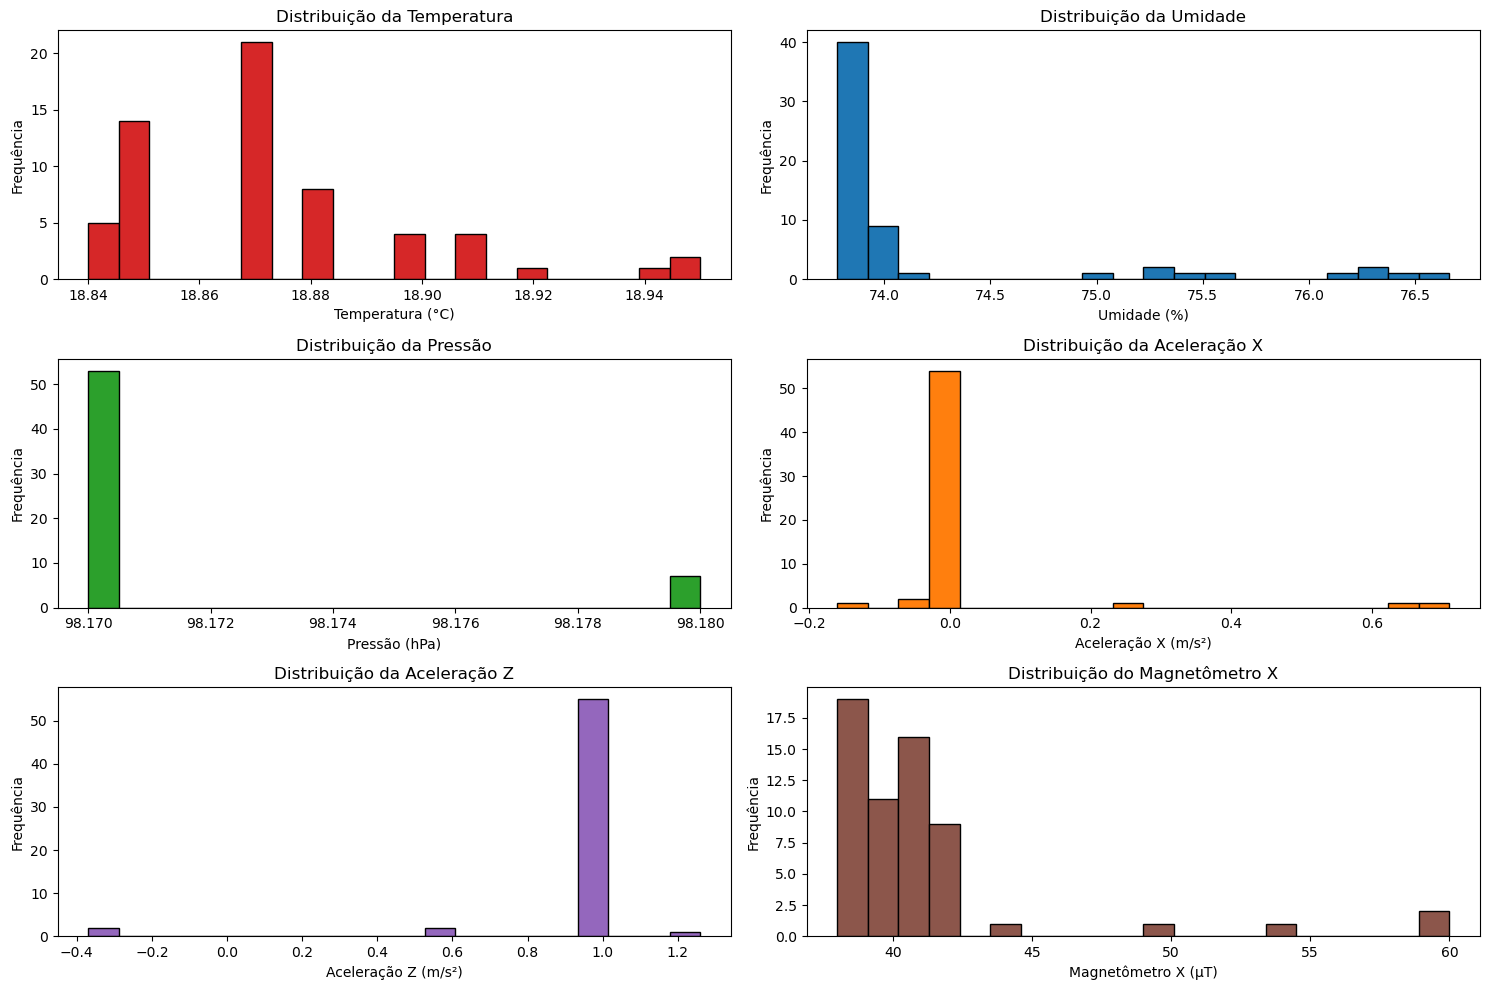

In [9]:
# Visualização dos histogramas de cada sensor
plt.figure(figsize=(15, 10))

# Histogramas para cada variável
plt.subplot(3, 2, 1)
plt.hist(df['Temperature (C)'], bins=20, color='tab:red', edgecolor='black')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frequência')
plt.title('Distribuição da Temperatura')

plt.subplot(3, 2, 2)
plt.hist(df['Humidity (%)'], bins=20, color='tab:blue', edgecolor='black')
plt.xlabel('Umidade (%)')
plt.ylabel('Frequência')
plt.title('Distribuição da Umidade')

plt.subplot(3, 2, 3)
plt.hist(df['Pressure (hPa)'], bins=20, color='tab:green', edgecolor='black')
plt.xlabel('Pressão (hPa)')
plt.ylabel('Frequência')
plt.title('Distribuição da Pressão')

plt.subplot(3, 2, 4)
plt.hist(df['Acc X'], bins=20, color='tab:orange', edgecolor='black')
plt.xlabel('Aceleração X (m/s²)')
plt.ylabel('Frequência')
plt.title('Distribuição da Aceleração X')

plt.subplot(3, 2, 5)
plt.hist(df['Acc Z'], bins=20, color='tab:purple', edgecolor='black')
plt.xlabel('Aceleração Z (m/s²)')
plt.ylabel('Frequência')
plt.title('Distribuição da Aceleração Z')

plt.subplot(3, 2, 6)
plt.hist(df['Mag X'], bins=20, color='tab:brown', edgecolor='black')
plt.xlabel('Magnetômetro X (µT)')
plt.ylabel('Frequência')
plt.title('Distribuição do Magnetômetro X')

plt.tight_layout()
plt.show()


# Matriz de Correlação entre Variáveis
O gráfico de calor (heatmap) da matriz de correlação mostra as relações entre as variáveis:

Cores: Representam o nível de correlação (valores entre -1 e 1). Vermelho indica correlação negativa, azul forte indica correlação positiva, e tons neutros indicam pouca ou nenhuma correlação.
Números: Mostram o coeficiente de correlação entre duas variáveis.
Interpretação: Ajuda a identificar relações significativas entre variáveis, como se uma aceleração está correlacionada com uma mudança na pressão ou temperatura.

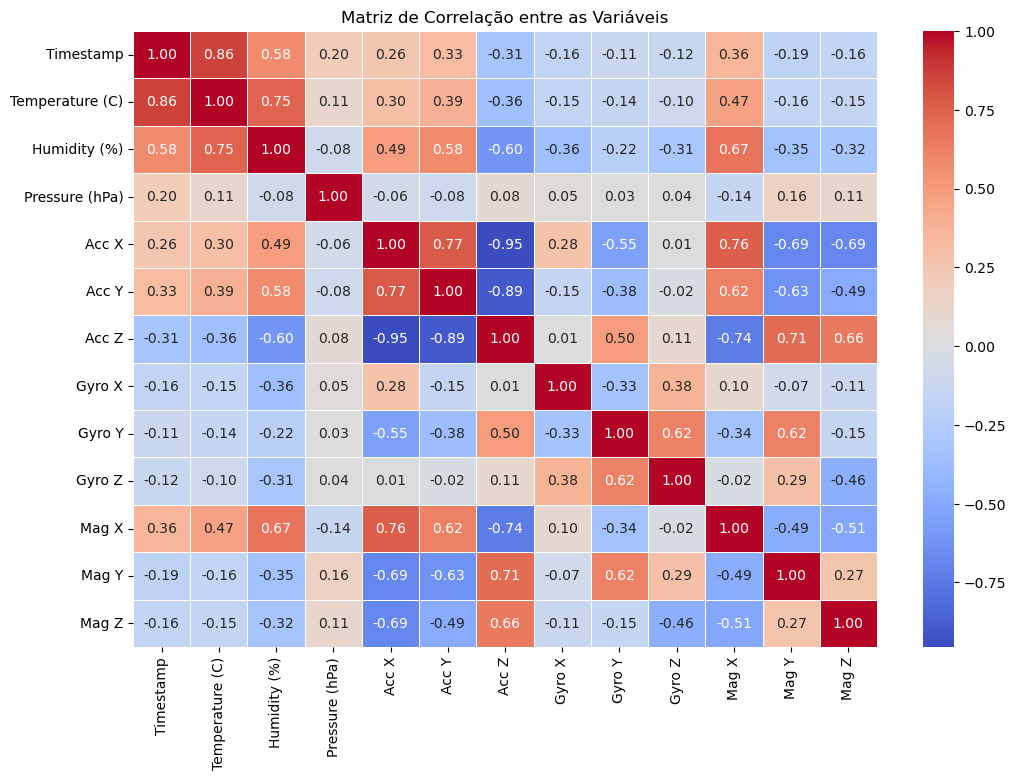

In [10]:
# Correlação entre variáveis
correlation_matrix = df.corr()

# Gráfico de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre as Variáveis")
plt.show()
